Lo cargamos desde un pickle para no perder los tipos de datos de las columnas, puesto que con csv los perderiamos

In [4]:
import polars as pl
import pickle


with open("datos_cleaned_grouped.pkl", "rb") as file:
    df = pickle.load(file)

df = df.sort("InvoiceDate")
df


InvoiceDate,TotalSales,weekday,is_holiday,is_month_start,is_month_end,quarter_num,Lag_1,Lag_7,Lag_30,MA_7,MA_14,MA_30
date,f64,i8,i64,i8,i8,i8,f64,f64,f64,f64,f64,f64
2010-12-01,26604.56,3,0,1,0,4,21458.16,12591.23,36867.04,17899.431429,15234.28,17913.767333
2010-12-02,23203.33,4,0,1,0,4,11153.43,3981.37,13652.66,13151.775714,13674.501429,15200.728667
2010-12-05,20738.69,7,0,1,0,4,16977.64,22369.06,10370.63,17773.847143,16847.534286,15992.225333
2010-12-07,25345.38,2,0,1,0,4,11789.36,13215.98,35696.84,18000.218571,16411.863571,16612.621667
2010-12-08,26379.94,3,0,1,0,4,22369.06,12371.26,19162.26,17922.461429,15320.713571,15808.637667
…,…,…,…,…,…,…,…,…,…,…,…,…
2011-12-05,45057.32,1,0,1,0,4,15855.32,35696.84,7439.5,17321.857143,20623.167143,18314.883
2011-12-06,26898.4,2,0,1,0,4,3321.05,15938.83,4937.29,16671.73,18132.44,17275.171667
2011-12-07,27847.03,3,0,1,0,4,15285.24,12741.68,11251.67,17794.714286,17413.577143,17650.127333


In [5]:
FEATURES = ["weekday", "is_holiday", "is_month_start", "is_month_end", "quarter_num", 
            "Lag_1", "Lag_7", "Lag_30", "MA_7", "MA_14", "MA_30"]
TARGET = "TotalSales"

train_size = int(len(df) * 0.8)
train_df, test_df = df[:train_size], df[train_size:]

X_train, y_train = train_df[FEATURES], train_df[TARGET]
X_test, y_test = test_df[FEATURES], test_df[TARGET]

XGBREGRESSOR

In [16]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = xgb.XGBRegressor(
    objective="reg:squarederror", 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=11, 
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=11, 
    random_state=42, 
    n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ARIMA

In [12]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)  # Convertir a NumPy array
    mask = y_true != 0  # Evitar divisiones por cero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Calcular métricas
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 - mape  # Precisión del modelo

# Mostrar resultados
metricas = {
    "MAPE (Mean Absolute Percentage Error)": mape,
    "Precisión del Modelo (%)": accuracy
}

print(metricas)

{'MAPE (Mean Absolute Percentage Error)': np.float64(38.10363726618478), 'Precisión del Modelo (%)': np.float64(61.89636273381522)}


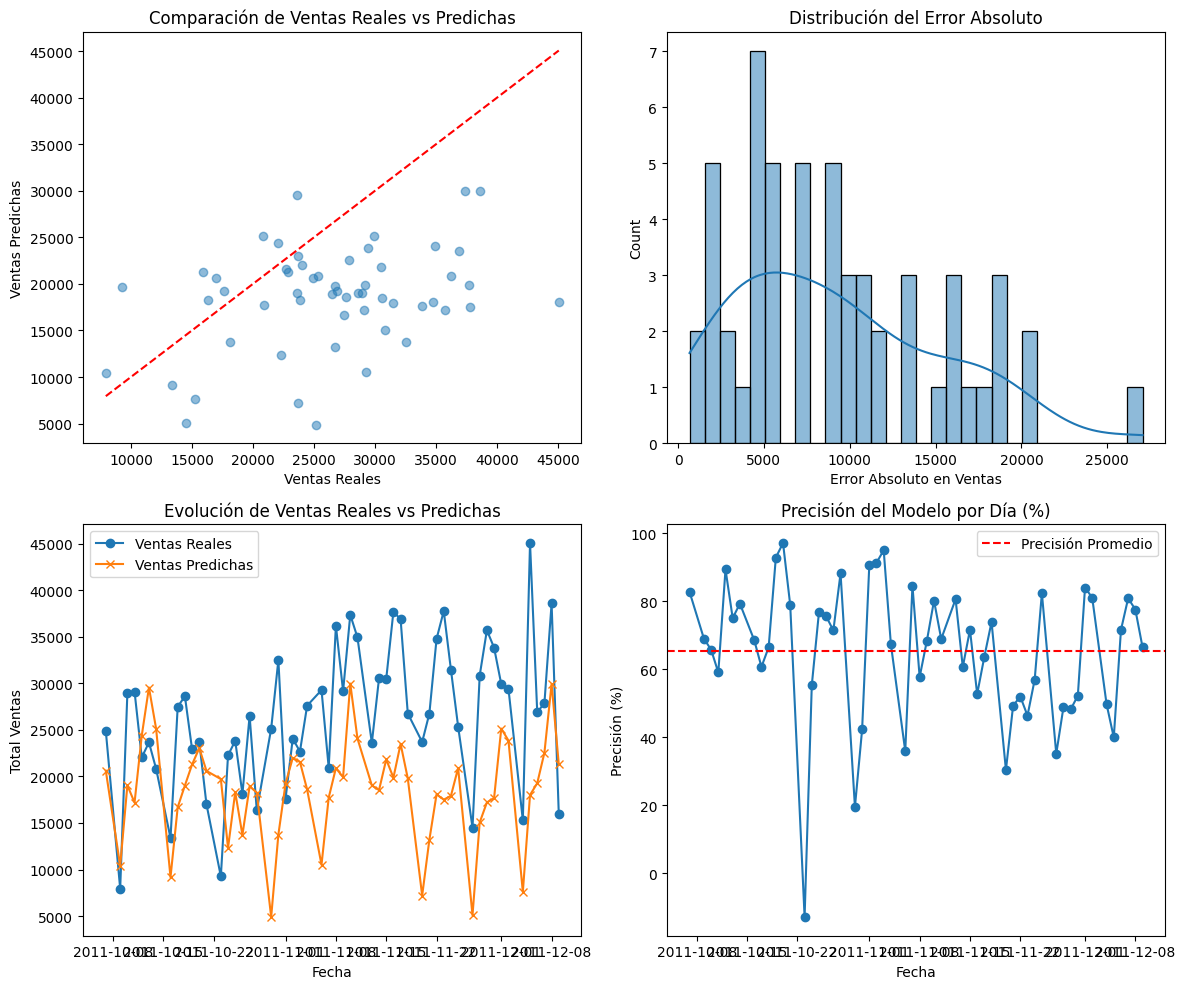

{'MAE (Mean Absolute Error)': np.float64(9256.794621804018),
 'RMSE (Root Mean Squared Error)': np.float64(11033.610964512645),
 'MAPE (Mean Absolute Percentage Error)': np.float64(34.572131368010645),
 'Precisión Promedio del Modelo (%)': np.float64(65.42786863198936)}

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


df_results = pd.DataFrame({
    "Fecha": test_df["InvoiceDate"],
    # "País": test_df["Country"],
    "Ventas Reales": y_test,
    "Ventas Predichas": y_pred,
    "Error Absoluto": np.abs(y_test - y_pred),
    "Error Relativo (%)": np.abs((y_test - y_pred) / y_test) * 100
})


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 - mape  


fig, ax = plt.subplots(2, 2, figsize=(12, 10))


ax[0, 0].scatter(y_test, y_pred, alpha=0.5)
ax[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
ax[0, 0].set_xlabel("Ventas Reales")
ax[0, 0].set_ylabel("Ventas Predichas")
ax[0, 0].set_title("Comparación de Ventas Reales vs Predichas")


sns.histplot(df_results["Error Absoluto"], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title("Distribución del Error Absoluto")
ax[0, 1].set_xlabel("Error Absoluto en Ventas")


df_results = df_results.sort_values("Fecha")
ax[1, 0].plot(df_results["Fecha"], df_results["Ventas Reales"], label="Ventas Reales", marker='o')
ax[1, 0].plot(df_results["Fecha"], df_results["Ventas Predichas"], label="Ventas Predichas", marker='x')
ax[1, 0].set_title("Evolución de Ventas Reales vs Predichas")
ax[1, 0].set_xlabel("Fecha")
ax[1, 0].set_ylabel("Total Ventas")
ax[1, 0].legend()


ax[1, 1].plot(df_results["Fecha"], 100 - df_results["Error Relativo (%)"], marker='o', linestyle='-')
ax[1, 1].set_title("Precisión del Modelo por Día (%)")
ax[1, 1].set_xlabel("Fecha")
ax[1, 1].set_ylabel("Precisión (%)")
ax[1, 1].axhline(y=accuracy, color='red', linestyle='--', label="Precisión Promedio")
ax[1, 1].legend()

plt.tight_layout()
plt.show()


metricas = {
    "MAE (Mean Absolute Error)": mae,
    "RMSE (Root Mean Squared Error)": rmse,
    "MAPE (Mean Absolute Percentage Error)": mape,
    "Precisión Promedio del Modelo (%)": accuracy
}

metricas


Ahora filtramos por el limite superior

In [10]:
df.filter(df["TotalSales"] > 33.3)

InvoiceDate,TotalSales,weekday,is_holiday,is_month_start,is_month_end,quarter_num,Lag_1,Lag_7,Lag_30,MA_7,MA_14,MA_30
date,f64,i8,i64,i8,i8,i8,f64,f64,f64,f64,f64,f64
2010-12-01,26604.56,3,0,1,0,4,21458.16,12591.23,36867.04,17899.431429,15234.28,17913.767333
2010-12-02,23203.33,4,0,1,0,4,11153.43,3981.37,13652.66,13151.775714,13674.501429,15200.728667
2010-12-05,20738.69,7,0,1,0,4,16977.64,22369.06,10370.63,17773.847143,16847.534286,15992.225333
2010-12-07,25345.38,2,0,1,0,4,11789.36,13215.98,35696.84,18000.218571,16411.863571,16612.621667
2010-12-08,26379.94,3,0,1,0,4,22369.06,12371.26,19162.26,17922.461429,15320.713571,15808.637667
…,…,…,…,…,…,…,…,…,…,…,…,…
2011-12-05,45057.32,1,0,1,0,4,15855.32,35696.84,7439.5,17321.857143,20623.167143,18314.883
2011-12-06,26898.4,2,0,1,0,4,3321.05,15938.83,4937.29,16671.73,18132.44,17275.171667
2011-12-07,27847.03,3,0,1,0,4,15285.24,12741.68,11251.67,17794.714286,17413.577143,17650.127333


Las acciones ejecutadas sobre el dataset como proceso de transformación de datos, justificando las técnicas utilizadas y las decisiones tomadas.

Las acciones ejecutadas sobre el dataset para crear los conjuntos de entrenamiento, validación y test, justificando las decisiones tomadas.
El entrenamiento de, al menos, un modelo de regresión, explicando la implementación realizada y mostrando claramente el resultado obtenido.


el dia de la semana puede ser util para detectrar patrones semanales
detectar si es dia festivo